# Machine Learning - Projeto Integrado

## Enunciado

Neste trabalho, como parte do time de analistas da Quantum Finance, vocês deverão explorar uma base de dados originalmente utilizada para classificação de score de crédito, utilizando técnicas de Análise Exploratória de Dados (EDA) e algoritmos de Machine Learning supervisionados ou não supervisionados.<br><br>
- dados: https://raw.githubusercontent.com/lcbjrrr/QuantumF/main/credit%20-%20ok.csv
- O objetivo é aplicar e interpretar os resultados obtidos, assim como criar um sistema que gere valor a partir da análise da base de dados.<br><br>
- Parte 1: Modelo de Classificação Supervisionada - Desenvolver um modelo de classificação supervisionada para prever a classificação de crédito dos indivíduos presentes na base. Passos esperados:
-  Realizar uma análise exploratória dos dados (EDA) para entender as características principais da base e as relações entre variáveis;
- Implementar o modelo de classificação (ex.: Decision Tree, Random Forest, Logistic Regression, ou outro);
- Avaliar os resultados utilizando métricas como acurácia, F1-score, matriz de confusão, entre outras relevantes;
- Apresentar os resultados e explicar como o modelo pode ser utilizado para decisões financeiras.<br><br>
- Parte 2: Algoritmo Não Supervisionado - Implementar um algoritmo não supervisionado. Passos esperados:
- Realizar a análise de negócio para definir as estratégias da aplicação do algoritmo não supervisionado
- Aplicar a técnica escolhida (ex: Apriori ou KMeans) e documentar a experiência, destacando os resultados obtidos, os desafios enfrentados, e as conclusões da abordagem escolhida.

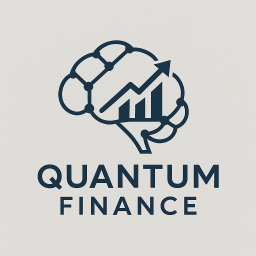

## Integrantes


    1) Nome: Jéssica Portela de Castro    RM: 359735
    2) Nome: Tiago Freire Barbosa         RM: 358404

## Importação das Bibliotecas

In [275]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from itertools import chain
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Conjunto de Dados

### Dicionário de Variáveis

| Variável                     | Descrição                                                                 | Categorias/Exemplos                                                                 | Tipo de Variável           |
|------------------------------|---------------------------------------------------------------------------|--------------------------------------------------------------------------------------|----------------------------|
| **ID**                       | Identificador único interno do registro                                   | Ex: 0x1602                                                                           | Qualitativa Nominal        |
| **Customer_ID**              | Identificador único do cliente                                            | Ex: CUS_0xd40                                                                        | Qualitativa Nominal        |
| **Month**                    | Mês de referência do registro                                             | January, February, ..., December                                                    | Qualitativa Nominal        |
| **Name**                     | Nome completo do cliente                                                  | Ex: Aaron Maashoh                                                                   | Qualitativa Nominal        |
| **Age**                      | Idade do cliente                                                          | Ex: 23                                                                               | Quantitativa Contínua      |
| **SSN**                      | Número de seguridade social                                               | Ex: 821-00-0265                                                                      | Qualitativa Nominal        |
| **Occupation**               | Ocupação do cliente                                                       | Scientist, Teacher, Engineer, etc.                                                  | Qualitativa Nominal        |
| **Annual_Income**            | Renda anual declarada pelo cliente                                        | Ex: 19114.12                                                                         | Quantitativa Contínua      |
| **Monthly_Inhand_Salary**    | Salário mensal disponível (renda líquida)                                 | Ex: 1824.84                                                                          | Quantitativa Contínua      |
| **Num_Bank_Accounts**        | Número de contas bancárias                                                | Ex: 3                                                                                | Quantitativa Discreta      |
| **Num_Credit_Card**          | Número de cartões de crédito                                              | Ex: 4                                                                                | Quantitativa Discreta      |
| **Interest_Rate**            | Taxa de juros associada ao cliente                                        | Ex: 15                                                                               | Quantitativa Discreta      |
| **Num_of_Loan**              | Número de empréstimos ativos                                              | Ex: 2                                                                                | Quantitativa Discreta      |
| **Type_of_Loan**             | Tipo(s) de empréstimos ativos                                             | Credit-Builder, Auto Loan, etc.                                                     | Qualitativa Nominal        |
| **Delay_from_due_date**      | Atraso médio (em dias) no pagamento de dívidas                            | Ex: 12                                                                               | Quantitativa Discreta      |
| **Num_of_Delayed_Payment**   | Número de pagamentos realizados com atraso                                | Ex: 3                                                                                | Quantitativa Discreta      |
| **Changed_Credit_Limit**     | Variação no limite de crédito                                             | Ex: 11.0                                                                             | Quantitativa Contínua      |
| **Num_Credit_Inquiries**     | Número de consultas de crédito                                            | Ex: 1                                                                                | Quantitativa Discreta      |
| **Credit_Mix**               | Qualidade do mix de crédito do cliente                                    | Standard, Good, Bad                                                                  | Qualitativa Ordinal        |
| **Outstanding_Debt**         | Dívida pendente atual                                                     | Ex: 809.98                                                                           | Quantitativa Contínua      |
| **Credit_Utilization_Ratio** | Proporção de uso do crédito disponível                                    | Ex: 26.82                                                                            | Quantitativa Contínua      |
| **Credit_History_Age**       | Tempo de histórico de crédito                                             | Ex: 22 Years and 3 Months                                                            | Qualitativa Ordinal        |
| **Payment_of_Min_Amount**    | Indica se o cliente paga o valor mínimo das faturas                       | Yes, No                                                                              | Qualitativa Binária        |
| **Total_EMI_per_month**      | Valor total de parcelas mensais de empréstimos                            | Ex: 49.57                                                                            | Quantitativa Contínua      |
| **Amount_invested_monthly**  | Valor médio investido mensalmente                                         | Ex: 80.41                                                                            | Quantitativa Contínua      |
| **Payment_Behaviour**        | Comportamento de pagamento                                                | High_spent_Small_value_payments, etc.                                               | Qualitativa Nominal        |
| **Monthly_Balance**          | Saldo mensal remanescente após despesas                                   | Ex: 312.49                                                                           | Quantitativa Contínua      |
| **Credit_Score**             | Classificação do crédito do cliente                                       | Poor, Standard, Good                                                                 | Qualitativa Ordinal        |


## Importação do Dataset

Importação dos dados para um **dataframe** do pandas, definindo a opção **max_columns** e **max_rows** como **None**, para que ao utilizarmos **df.head()**, todas as colunas e linhas do **dataframe** sejam exibidas

In [276]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/QuantumF/main/credit%20-%20ok.csv')

## Conversão de Variáveis Qualitativas para Quantitativas

Para que as variáveis sejam exibidas corretamente na análise estatística descritiva, é importante converter as variáveis para seus formatos corretos

- Em nosso **dataframe**, existem variáveis quantitativas que estão no formato **object**, desta forma se faz necessário a conversão para **Int64** ou **float**, conforme o tipo da variável (**discreta** ou **contínua**)

In [277]:
df['Age'] = pd.to_numeric(df['Age'].str.replace('_', ''), errors='coerce').astype('Int64')

df['Annual_Income'] = df['Annual_Income'].str.replace('_', '').astype(float)

df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'].str.replace('_', ''), errors='coerce').astype('Int64')

df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'].str.replace('_', ''), errors='coerce').astype('Int64')

df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'].str.replace('_', ''), errors='coerce').astype(float)

df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'].str.replace('_', ''), errors='coerce').astype(float)

df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'].str.replace('_', ''), errors='coerce').astype(float)

df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'].str.replace('_', ''), errors='coerce').astype(float)

## Análise Exploratória dos Dados

### Exibindo o Dataset

Exibição das primeiras 5 linhas do dataset

- O dados seguem uma ordem cronológica de registros mensal por cliente

In [278]:
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,<NA>,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,<NA>,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


### Tamanho do Dataset

O dataset importando possui **83.144** linhas e **28** colunas

In [279]:
df.shape

(83144, 28)

### Informações do Dataset

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83144 entries, 0 to 83143
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        83144 non-null  object 
 1   Customer_ID               83144 non-null  object 
 2   Month                     83144 non-null  object 
 3   Name                      74822 non-null  object 
 4   Age                       83144 non-null  Int64  
 5   SSN                       83144 non-null  object 
 6   Occupation                83144 non-null  object 
 7   Annual_Income             83144 non-null  float64
 8   Monthly_Inhand_Salary     70703 non-null  float64
 9   Num_Bank_Accounts         83144 non-null  int64  
 10  Num_Credit_Card           83144 non-null  int64  
 11  Interest_Rate             83144 non-null  int64  
 12  Num_of_Loan               83144 non-null  Int64  
 13  Type_of_Loan              73622 non-null  object 
 14  Delay_

#### Proporção Por Tipo de Dados

O dataset possui em sua  grande maioria variáveis qualitativas, seguido de quantitativas contínuas e discretas, aqui temos 2 tipos de int, sendo:<br>

- **int64**: não aceita valores nulos
- **Int64**: aceita valores nulos

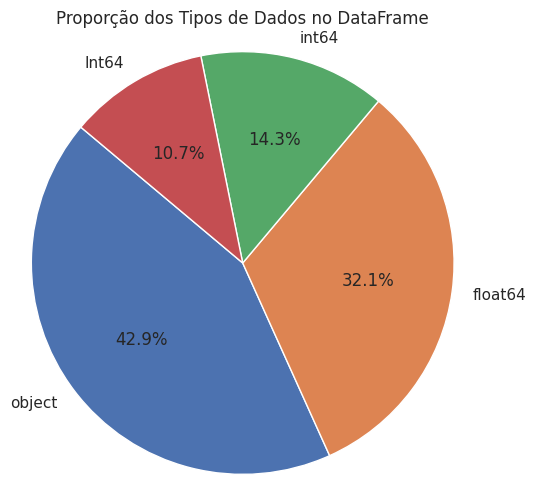

In [281]:
dtypes_count = df.dtypes.value_counts()

dtypes_count.index = dtypes_count.index.astype(str)

plt.figure(figsize=(6, 6))
plt.pie(dtypes_count, labels=dtypes_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporção dos Tipos de Dados no DataFrame')
plt.axis('equal')
plt.show()

### Análise Estatística Descritiva

Na análise estatística descritiva, podemos notar **outliers**, que necessitam de tratamento, por exemplo na variável **Age**, temos um cliente com **8682** anos<br><br>
Outra variável que chama a atenção é **Num_Bank_Accounts** um cliente possui **1798** contas bancárias<br><br>

Este padrão de **outliers** se aplica a diversas variáveis do dataset, demonstrado a necessidade de tratamento

In [282]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,83144.0,8.314400e+04,70703.000000,83144.000000,83144.000000,83144.000000,83144.0,83144.000000,77339.0,81432.000000,81528.000000,83144.000000,83144.000000,83144.000000,79455.000000,8.212500e+04
mean,109.103748,1.782358e+05,4193.869821,16.924059,22.301309,73.209191,3.175984,21.050382,30.432705,10.362193,27.681594,1424.704732,32.298935,1380.861140,637.723567,-2.841197e+22
std,678.92599,1.445496e+06,3187.081513,116.875468,128.481073,470.881900,63.755833,14.841171,221.95927,6.779652,192.442884,1155.185801,5.116523,8243.094161,2043.365803,3.077331e+24
min,-500.0,7.005930e+03,319.556250,-1.000000,0.000000,1.000000,-100.0,-5.000000,-3.0,-6.490000,0.000000,0.540000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.0,1.949365e+04,1629.773333,3.000000,4.000000,8.000000,1.0,10.000000,9.0,5.290000,3.000000,566.980000,28.063496,30.403233,74.518403,2.701928e+02
50%,33.0,3.746718e+04,3081.977500,6.000000,6.000000,13.000000,3.0,18.000000,14.0,9.390000,6.000000,1166.080000,32.333159,68.966090,136.081810,3.366183e+02
75%,42.0,7.258899e+04,5947.320000,7.000000,7.000000,20.000000,5.0,28.000000,18.0,14.820000,9.000000,1941.730000,36.517910,160.321434,265.422382,4.687991e+02
max,8682.0,2.419806e+07,15204.633330,1798.000000,1499.000000,5789.000000,1496.0,67.000000,4397.0,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


### Verificação de Valores Nulos

O dataset apresenta um grande número de valores nulos em diversas variáveis, exigindo um tratamento especial de acordo com o tipo de cada variável e sua relevância para o modelo

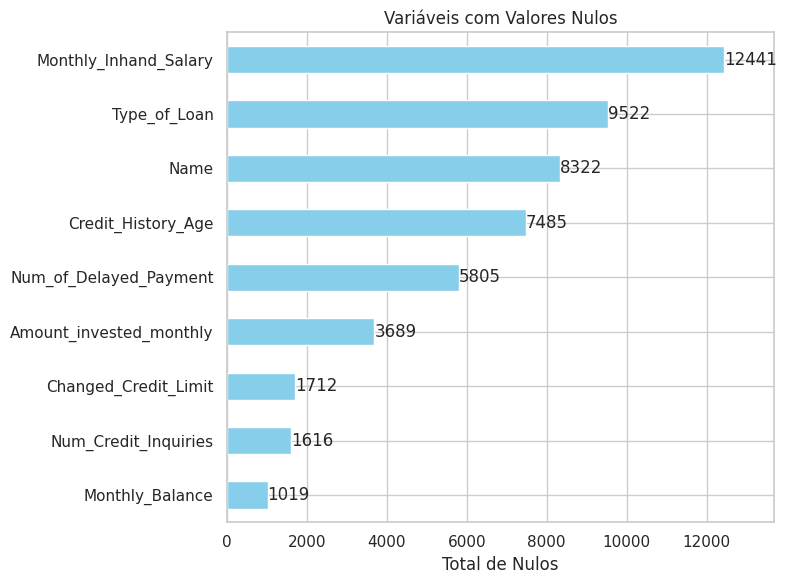

In [283]:
nulos = df.isnull().sum()[lambda x: x > 0].sort_values(ascending=True)

ax = nulos.plot(kind='barh', figsize=(8, 6), color='skyblue')
plt.title('Variáveis com Valores Nulos')
plt.xlabel('Total de Nulos')
plt.tight_layout()

plt.xlim(0, nulos.max() * 1.1)

for i, v in enumerate(nulos):
    plt.text(v + 0.5, i, str(int(v)), va='center')

plt.show()

### Distribuição das variáveis numéricas

#### Histograma

Podemos notar o impacto dos **outliers** no **histograma**, de modo que não fica evidente a distribuição da maioria das variáveis no dataset

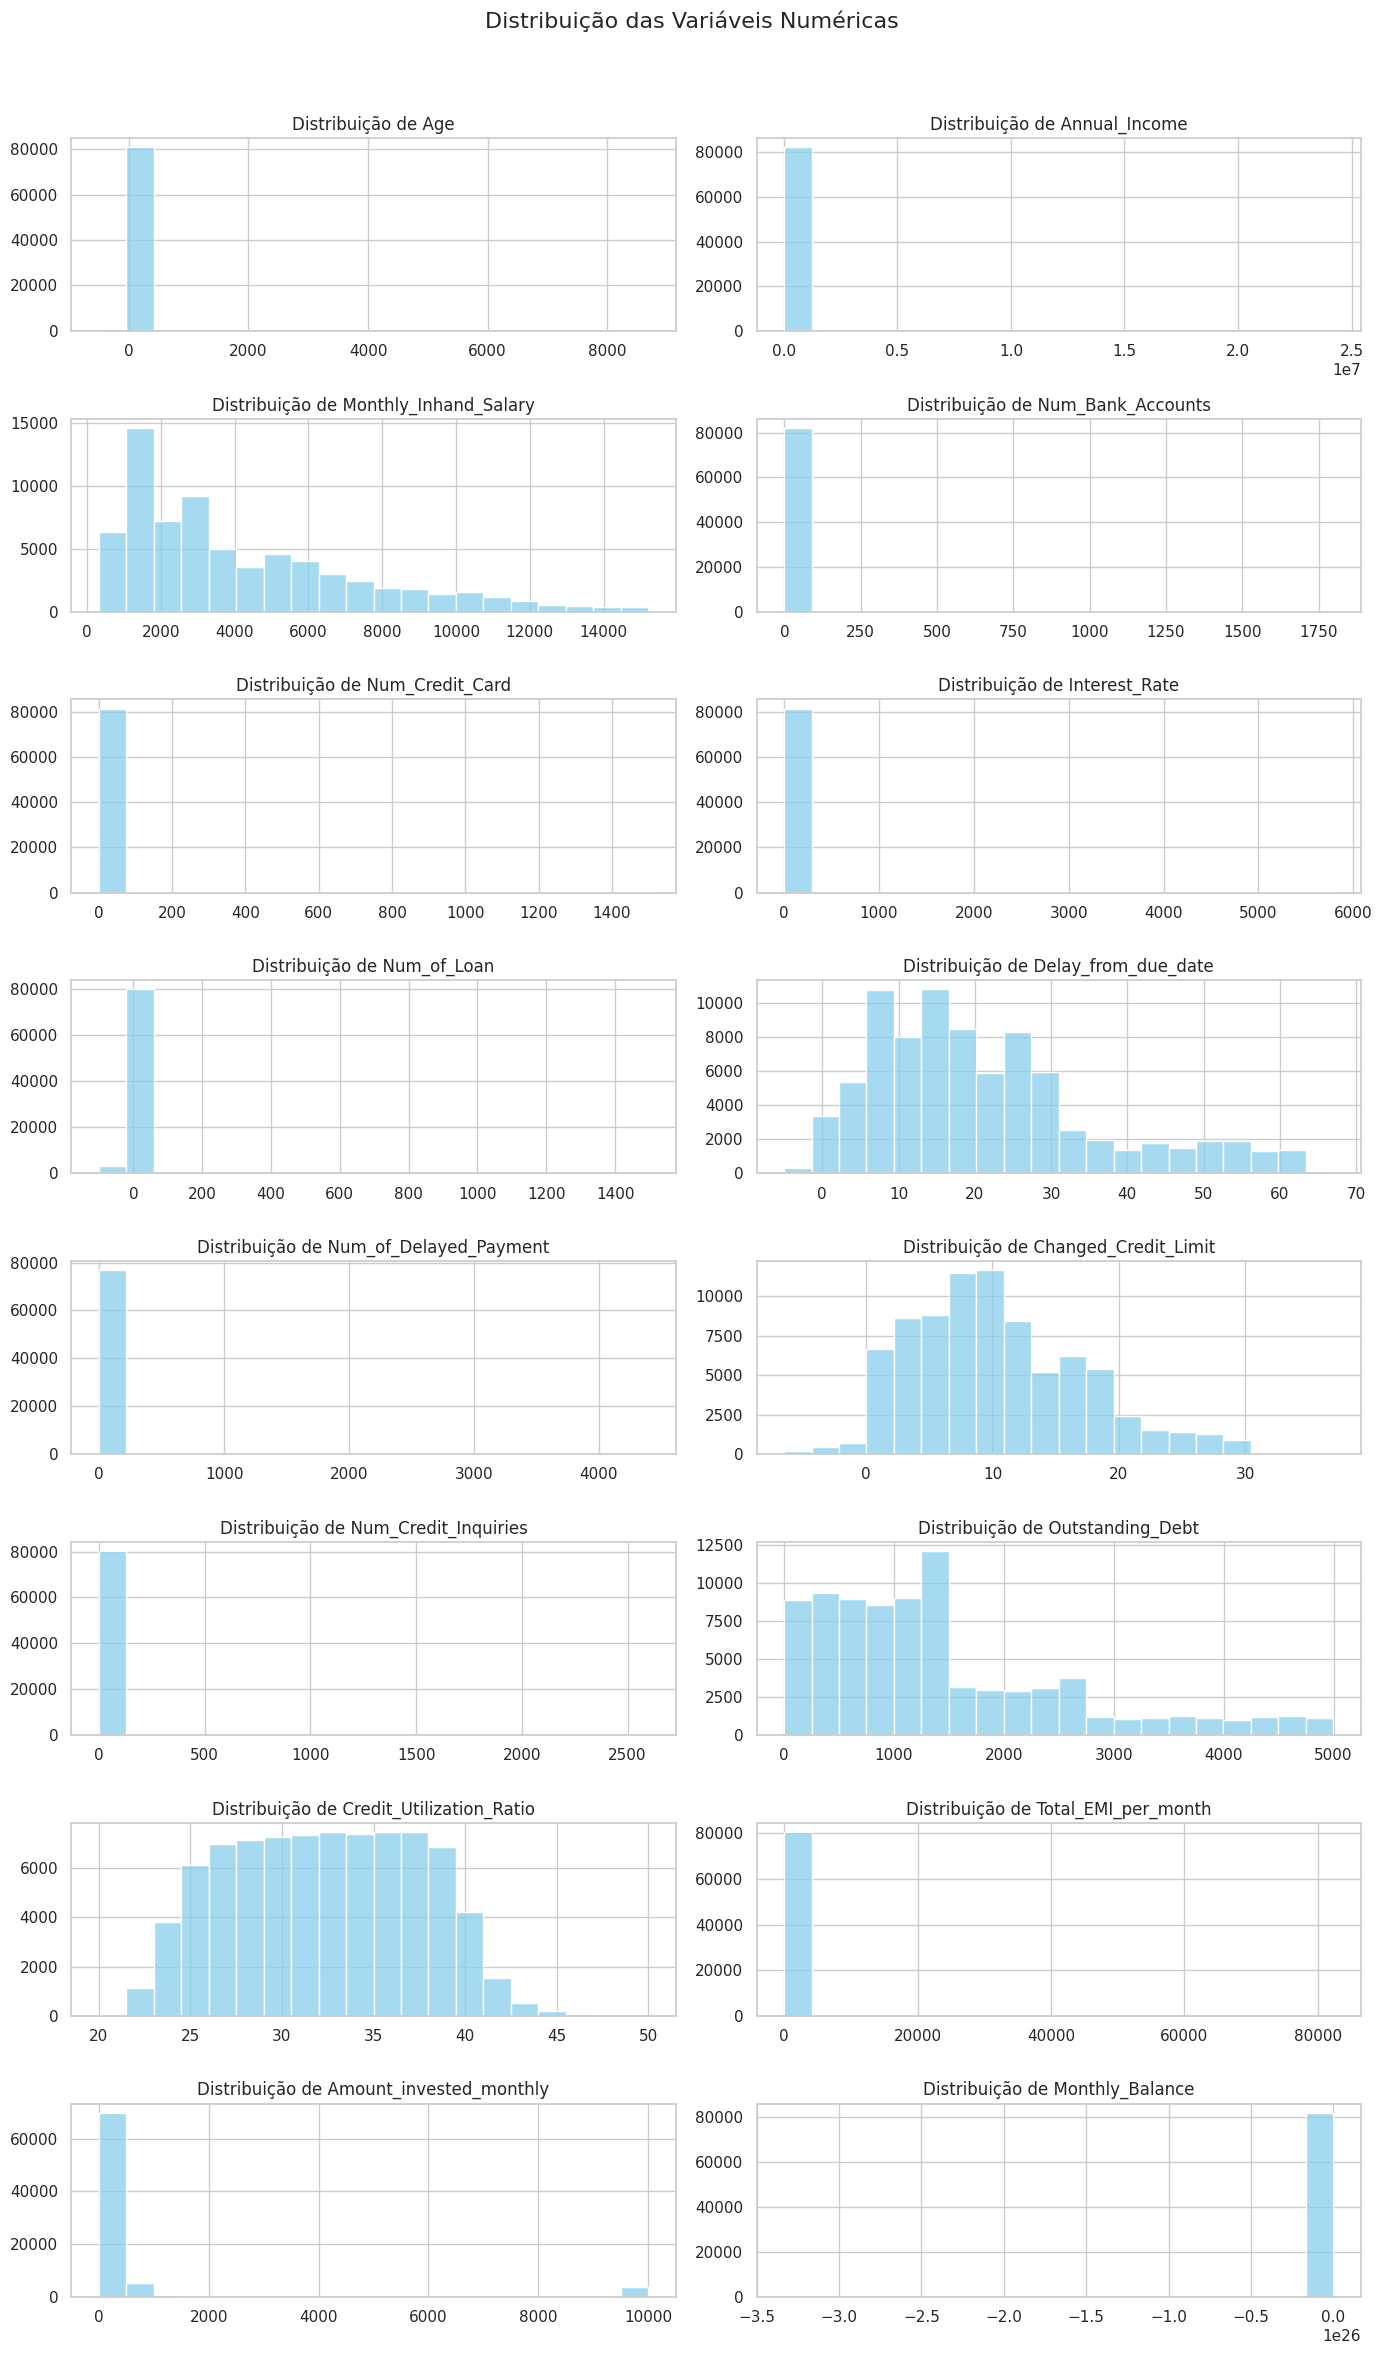

In [284]:
fig, axs = plt.subplots(8, 2, figsize=(14, 24))
fig.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)

numerical_columns = df.select_dtypes(include='number')
for i, column in enumerate(numerical_columns):
    ax = axs[i // 2, i % 2]
    sns.histplot(df[column], bins=20, ax=ax, color='skyblue')
    ax.set_title(f'Distribuição de {column}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Distribuição das variáveis categóricas

#### Barras

- A variável **Month** demonstra uma distribuição semelhante de dados históricos para todos os clientes<br>

- Em **Occupation** temos uma distribuição bastante parecida, com destaque especial para o valor `_______` que possui **5.838** registros<br>

- Em **Credit_Mix**, **standard** apresenta grande quantidade seguido de **Good** e **Bad**, temos muitos registros como `-`<br>

- **Payment_of_Min_Amount** mostra que a maioria dos clientes paga o valor minímo das faturas, existe uma quantidade considerável de registros como **NM**<br>

- Na variável **Payment_Behaviour** (Comportamento de pagamento), temos a grande maioria dos clientes concentrados em **Low_spent_Small_value_payments** (**21.251**)indicando uma tendência referente a pagamentos de baixo valor, seguido de **High_spent_Medium_value_payments** (**14.589**) e **Low_spent_Medium_value_payments** (**11.457**), e assim por diante, temos um número considerável de valores como **!@9#%8** (**6.326**) onde provavelmente será necessário tratamento posterior, essa variável é interessante pois descreve o comportamento de pagamento dos clientes, podendo ser de grande valia em modelos futuros<br>

- Em **Credit_Score** nossa variável alvo, podemos notar a maior concentração de clientes em **Standard** seguido de **Poor** e **Good**, aqui podemos notar que existe um desequilibrio sendo necessário a aplicação de técnicas de **balanceamento**<br>

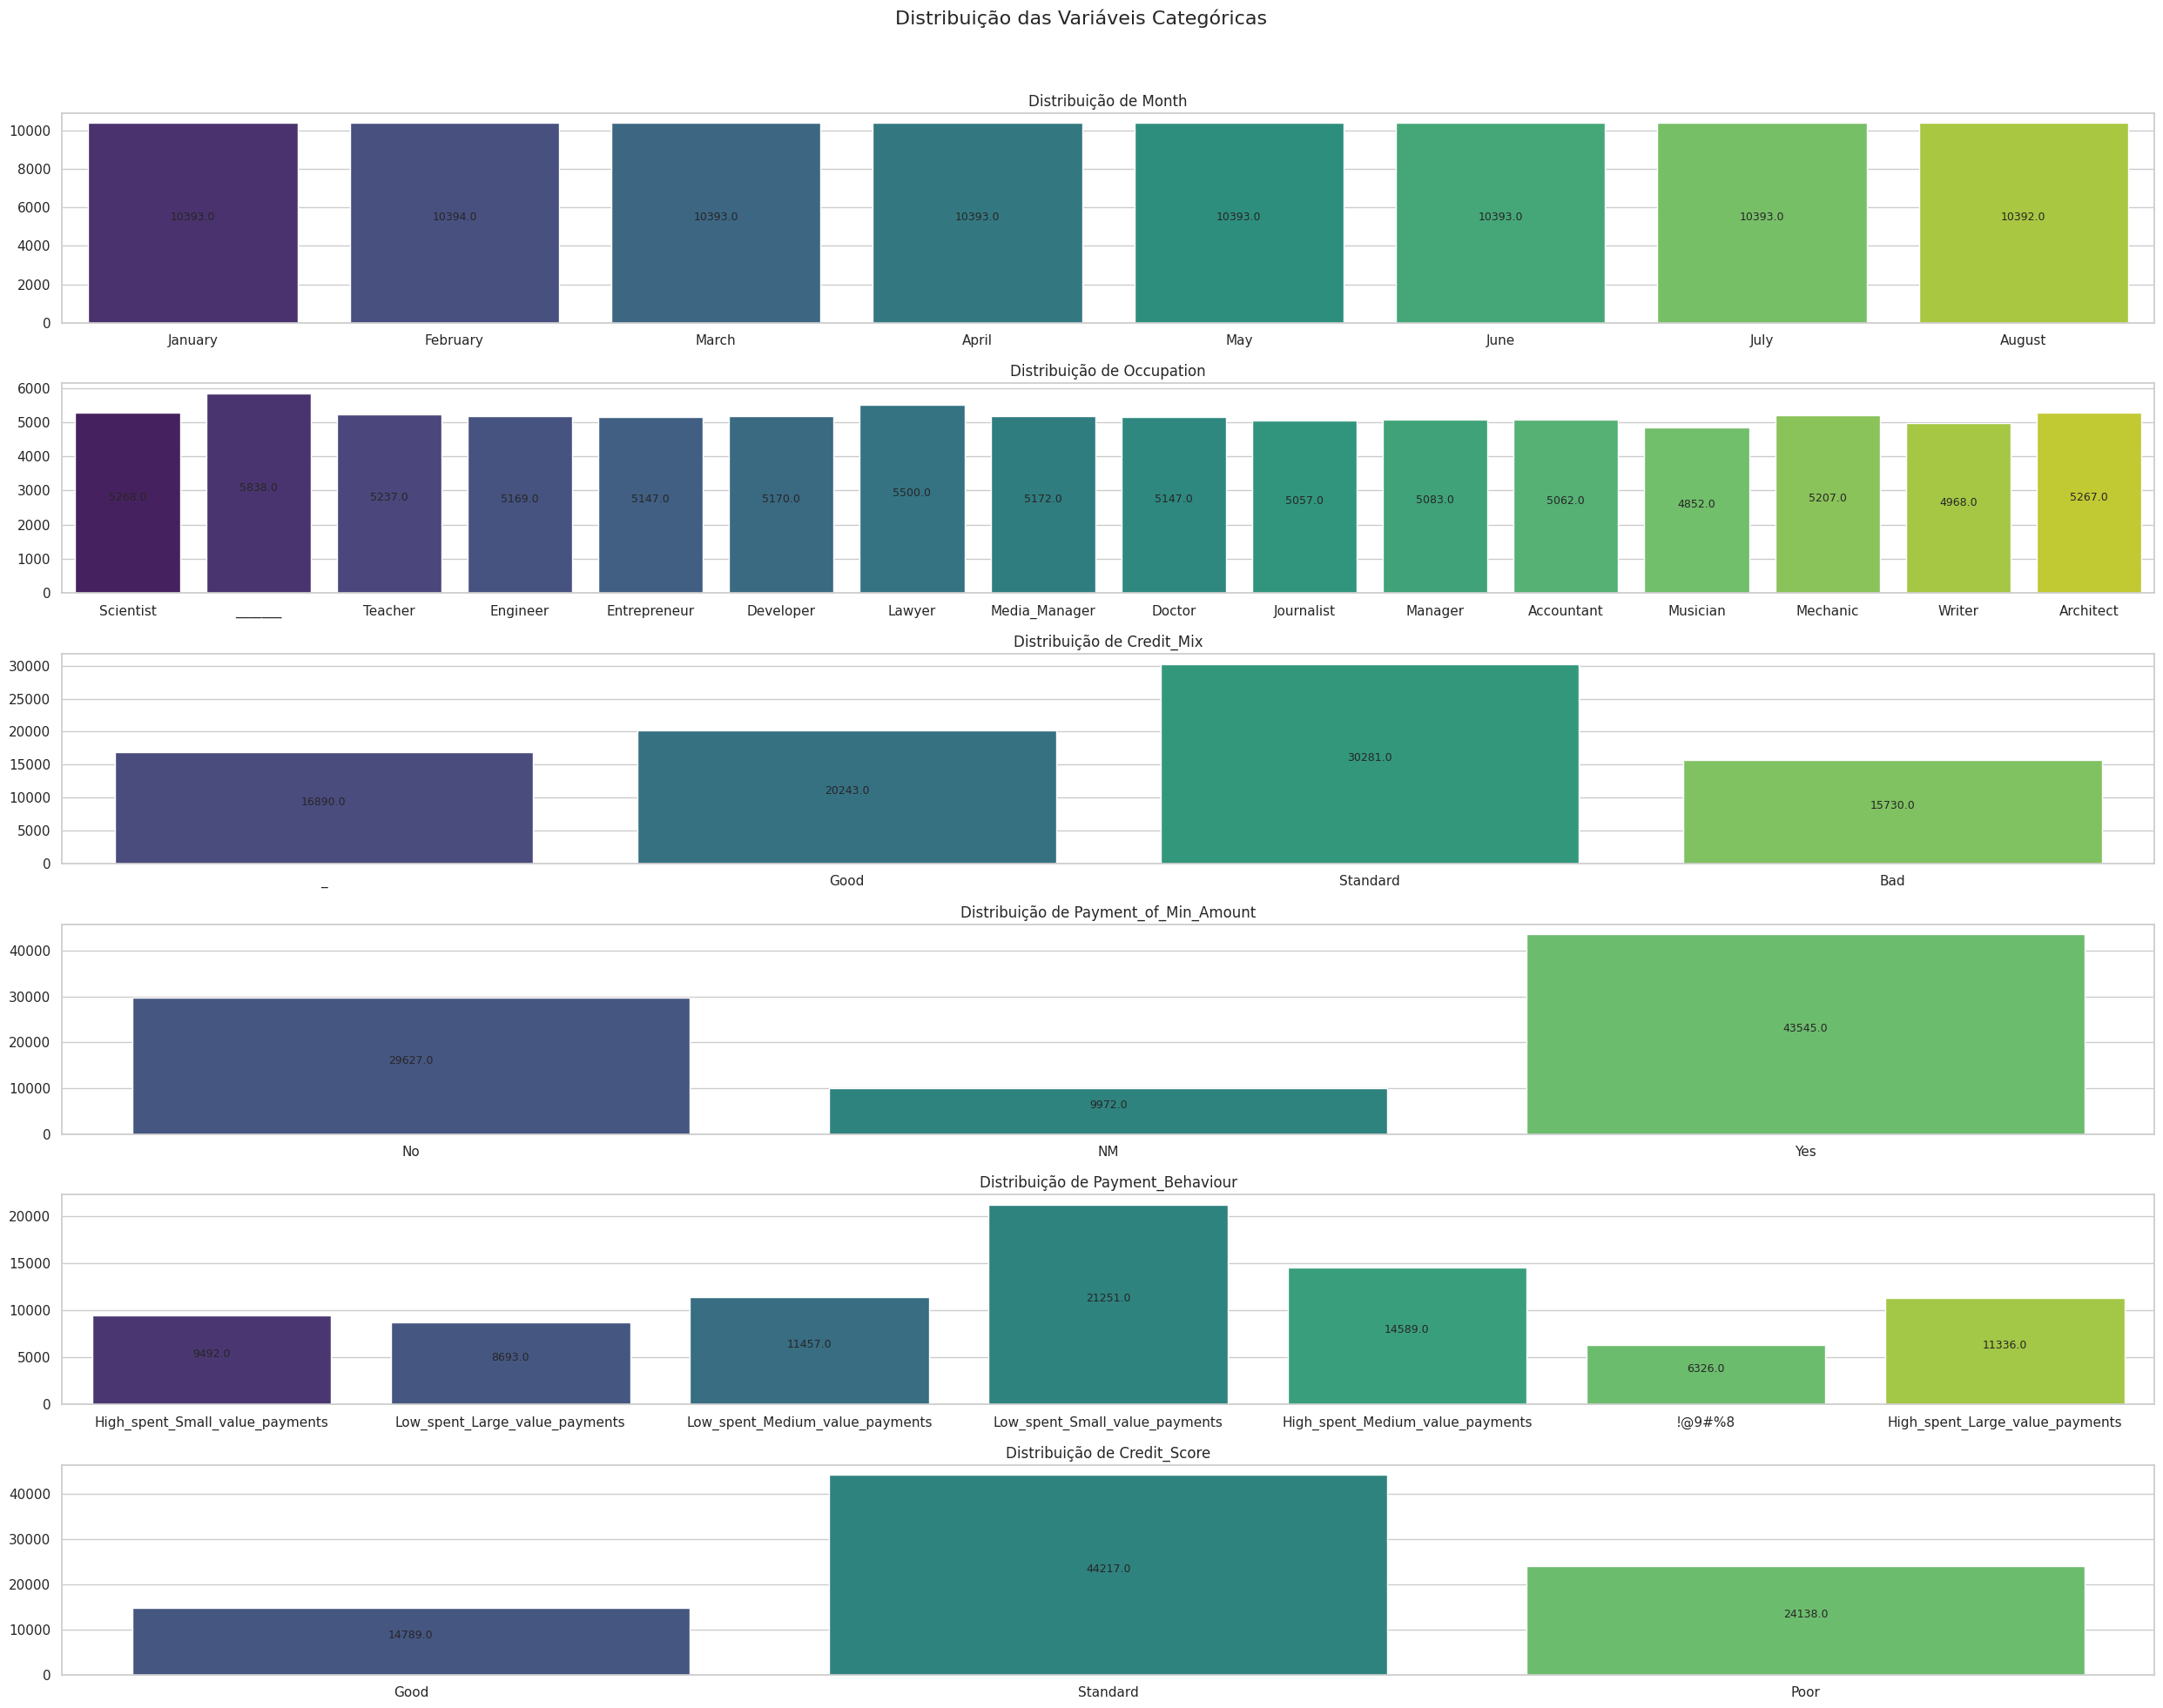

In [285]:
fig, axs = plt.subplots(6, 1, figsize=(25, 20))
fig.suptitle('Distribuição das Variáveis Categóricas', fontsize=16)

categorical_columns = ['Month', 'Occupation','Credit_Mix',
                       'Payment_of_Min_Amount',
                       'Payment_Behaviour','Credit_Score']

for i, column in enumerate(categorical_columns):
    ax = axs[i]
    sns.countplot(x=df[column], ax=ax, hue=df[column], palette='viridis')
    ax.set_title(f'Distribuição de {column}')
    ax.set_xlabel('')
    ax.set_ylabel('')

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height}',
                        (p.get_x() + p.get_width() / 2, height / 2),
                        ha='center', va='bottom', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

No total o dataset possui 12 colunas categóricas

In [286]:
df.select_dtypes(include='object').columns.tolist()

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'SSN',
 'Occupation',
 'Type_of_Loan',
 'Credit_Mix',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

Contando clientes únicos, verificamos que nossa base possui um total de **10.394** clientes

In [287]:
len(df['Customer_ID'].unique())

10394

valores únicos da variável **Occupation**

In [288]:
df['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

a coluna **Type_of_Loan** possui **5.357** valores distintos, entende-se que é devido muitos clientes possuirem mais de 1 ou mais empréstimo ativo, a coluna mostra uma combinação de todos para cada cliente

In [289]:
len(df['Type_of_Loan'].unique())

5357

valores únicos da variável **Credit_Mix**

In [290]:
df['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

a variável **Credit_History_Age** possui **405** valores distintos

In [291]:
len(df['Credit_History_Age'].unique())

405

valores únicos da variável **Payment_of_Min_Amount**

In [292]:
df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

valores únicos da variável **Payment_Behaviour**

In [293]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

valores únicos da variável **Credit_Score**


In [294]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

### Quartis

quartis (Q1, Q2 e Q3) das variáveis numéricas, o que ajuda a entender a **distribuição**, **tendência central** e **dispersão dos dados**

In [295]:
numerical_df = df.select_dtypes(include='number')
quartis = numerical_df.quantile([0.25, 0.5, 0.75])
quartis.rename(index={0.25: 'Q1 (25%)', 0.5: 'Q2 (Mediana)', 0.75: 'Q3 (75%)'})

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Q1 (25%),24.0,19493.65,1629.773333,3.0,4.0,8.0,1.0,10.0,9,5.29,3.0,566.98,28.063496,30.403233,74.518403,270.192814
Q2 (Mediana),33.0,37467.18,3081.977500,6.0,6.0,13.0,3.0,18.0,14,9.39,6.0,1166.08,32.333159,68.966090,136.081810,336.618257
Q3 (75%),42.0,72588.99,5947.320000,7.0,7.0,20.0,5.0,28.0,18,14.82,9.0,1941.73,36.517910,160.321434,265.422382,468.799145


### Boxplot

Através do **boxplot** podemos visualizar claramente a presença de outliers extremos em várias variáveis numéricas:<br>

- **Annual_Income**:	Muitos valores extremos à direita (renda muito alta)
- **Num_Bank_Accounts**:	Outliers indicam pessoas com centenas de contas bancárias — improvável
- **Num_Credit_Card**:	Casos com centenas de cartões, provavelmente erros ou valores raríssimos
- **Interest_Rate**:	Vários valores muito altos → pode haver erros ou taxas fora da realidade comum
- **Num_of_Loan**:	Muitos empréstimos ativos (acima de 50), parecem anormais
- **Num_of_Delayed_Payment**:	Atrasos em milhares — fora do comportamento típico
- **Num_Credit_Inquiries**:	Consultas acima de 1.000 são suspeitas
- **Total_EMI_per_month**:	Parcelas mensais com valores altíssimos
- **Amount_invested_monthly**:	Alguns poucos valores em torno de 10.000 que destoam do restante
- **Monthly_Balance**:	Alguns valores extremamente negativos (possível erro de registro)

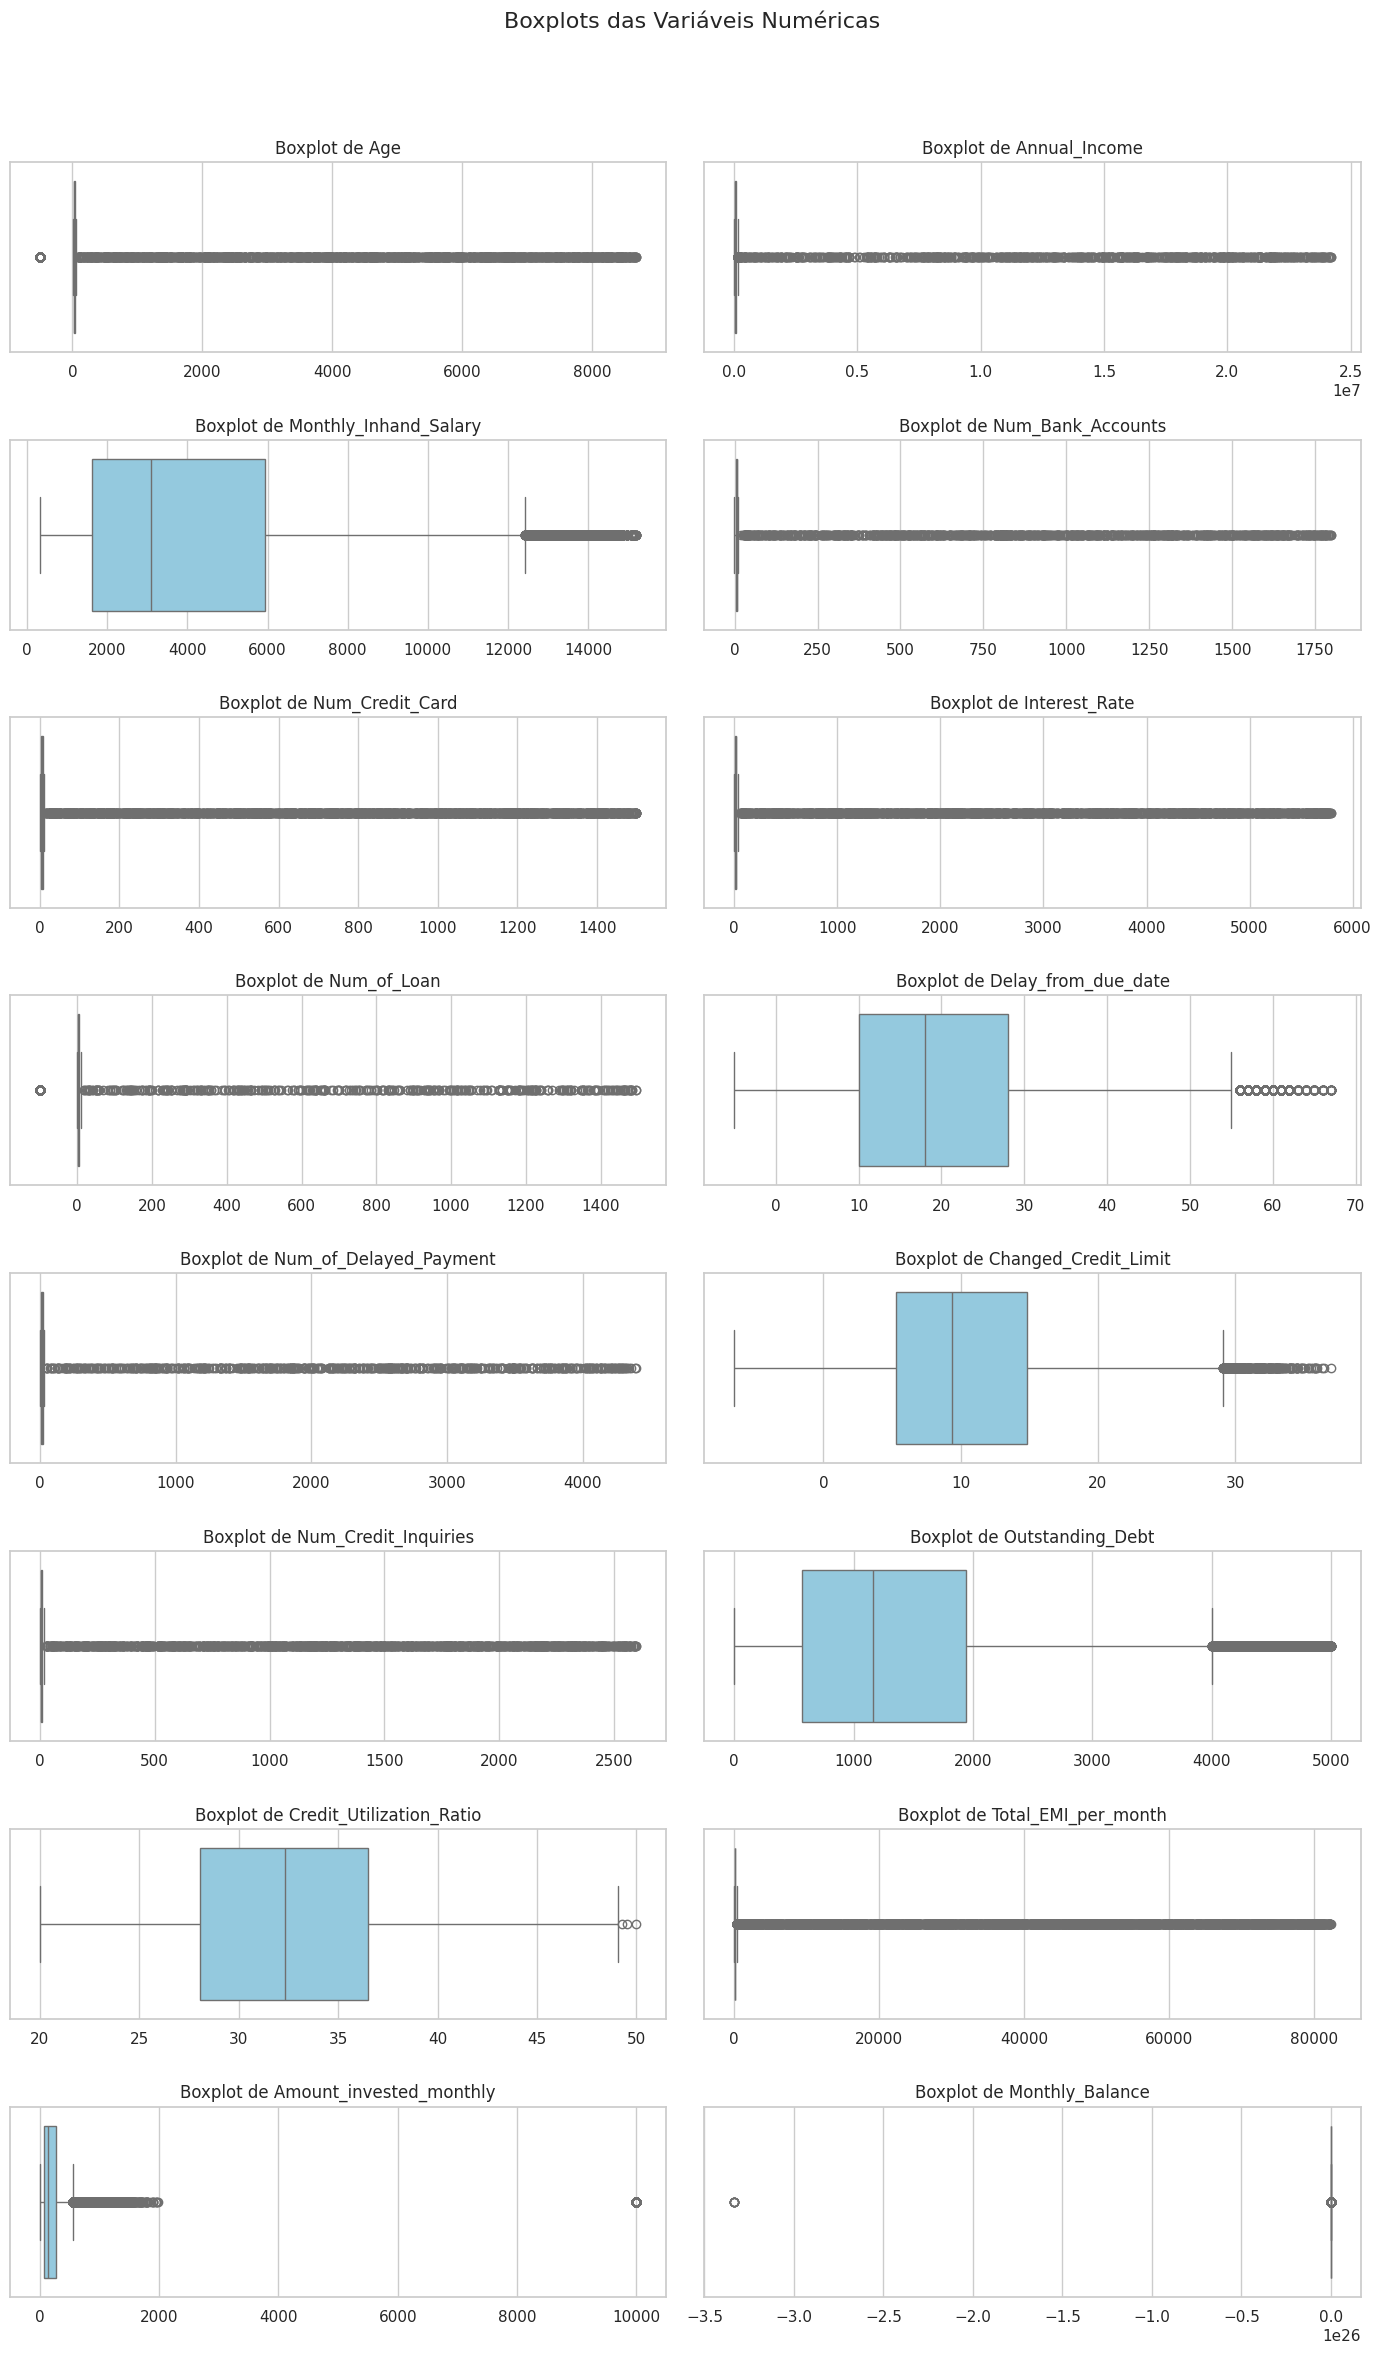

In [296]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(14, 24))
fig.suptitle("Boxplots das Variáveis Numéricas", fontsize=16)

bp_columns = numerical_df.columns.tolist()

for ax, bp_columns in zip(axes.flat, bp_columns):
    sns.boxplot(data=df, x=bp_columns, ax=ax, color='skyblue')
    ax.set_title(f'Boxplot de {bp_columns}')
    ax.set_xlabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Pré-Processamento

### Imputação

#### Imputação da Mediana em Variáveis Numéricas

Dado a quantidade de valores nulos identificados em nosso dataframe, aplicaremos a estratégia de imputação, usando como preenchimento a **mediana** para variáveis numéricas visto que é resistente a **outliers**

In [297]:
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median())

df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median())

df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].median())

df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median())

df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median())

df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Monthly_Balance'].median())

#### Imputação da Moda em Variáveis Categóricas

para o tratamento de variáveis categóricas utilizaremos a **moda** para imputação



In [298]:
df['Type_of_Loan'] = df['Type_of_Loan'].fillna(df['Type_of_Loan'].mode()[0])

df['Credit_History_Age'] = df['Credit_History_Age'].fillna(df['Credit_History_Age'].mode()[0])


- a varável **Name**, não é importante para os modelos e será excluída

In [299]:
nulos_imput = df.isnull().sum()[lambda x: x > 0].sort_values(ascending=True)

nulos_imput

,0
Name,8322


#### Imputação de Valores Desconhecidos

Na análise de distribuição das variáveis categóricas, verificamos que alguns dados tinham um preenchimento estranho, por exemplo, **Occupation** como `_______`, para tratamento destes valores faremos uma substituição destes valores por **Unknown**, desta forma preservamos a informação de que estes valores são desconhecidos e criamos uma categoria com maior relevância

In [300]:
df['Occupation'] = df['Occupation'].replace('_______', 'Unknown')

df['Credit_Mix'] = df['Credit_Mix'].replace('_', 'Unknown')

df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM', 'Unknown')

df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', 'Unknown')

### Transformação

A variável **Credit_History_Age** possui valores textuais no formato **22 Years and 1 Months**, no geral possui **405** valores distintos, o que é inviável para encoding posterior, desta forma transformamos essa variável em um dado númerico expresso em **meses**

In [301]:
def converter_idade_credito(texto):
    try:
        partes = texto.split()
        anos = int(partes[0]) if 'Years' in partes else 0
        meses = int(partes[3]) if 'Months' in partes else 0
        return anos * 12 + meses
    except:
        return np.nan

df['Credit_History_Age'] = df['Credit_History_Age'].apply(converter_idade_credito)

In [302]:
df['Credit_History_Age'] = df['Credit_History_Age'].astype(int)

numerical_df = df.select_dtypes(include='number')

A variável **Type_of_Loan** é uma coluna multivalorada, de modo que apresenta uma combinação de empréstimos referente a cada cliente, optamos por normalizar esta coluna criando uma coluna para cada tipo de empréstimo, e identificando com 0 ou 1, conforme a existência no registro

In [303]:
tipos_unicos = set(
    chain.from_iterable(
        df['Type_of_Loan'].dropna().str.split(',\s*')
    )
)

for tipo in tipos_unicos:
    df[tipo] = df['Type_of_Loan'].apply(lambda x: 1 if pd.notna(x) and tipo in x else 0)

df.drop('Type_of_Loan', axis=1, inplace=True)

### Tratamento de Outliers: Winsorization

Para o tratamentos do **outliers**, aplicamos a técnica de **winsorization** em todas as variáveis numéricas do dataset. A ideia é limitar os **outliers** aos limites definidos pelo intervalo interquartil (**IQR**), mantendo a estrutura dos dados e evitando distorções causadas por valores muito altos ou muito baixos

In [304]:
df_winsorized = df.copy()

for col in numerical_df.columns:
    Q1 = numerical_df[col].quantile(0.25)
    Q3 = numerical_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_winsorized[col] = np.where(df[col].notna() & (df[col] < lower_bound), lower_bound,
                           np.where(df[col].notna() & (df[col] > upper_bound), upper_bound, df[col]))

#### Boxplot (Sem Outliers)

Após a aplicação da **winsorization** podemos notar a suavização dos **outliers**

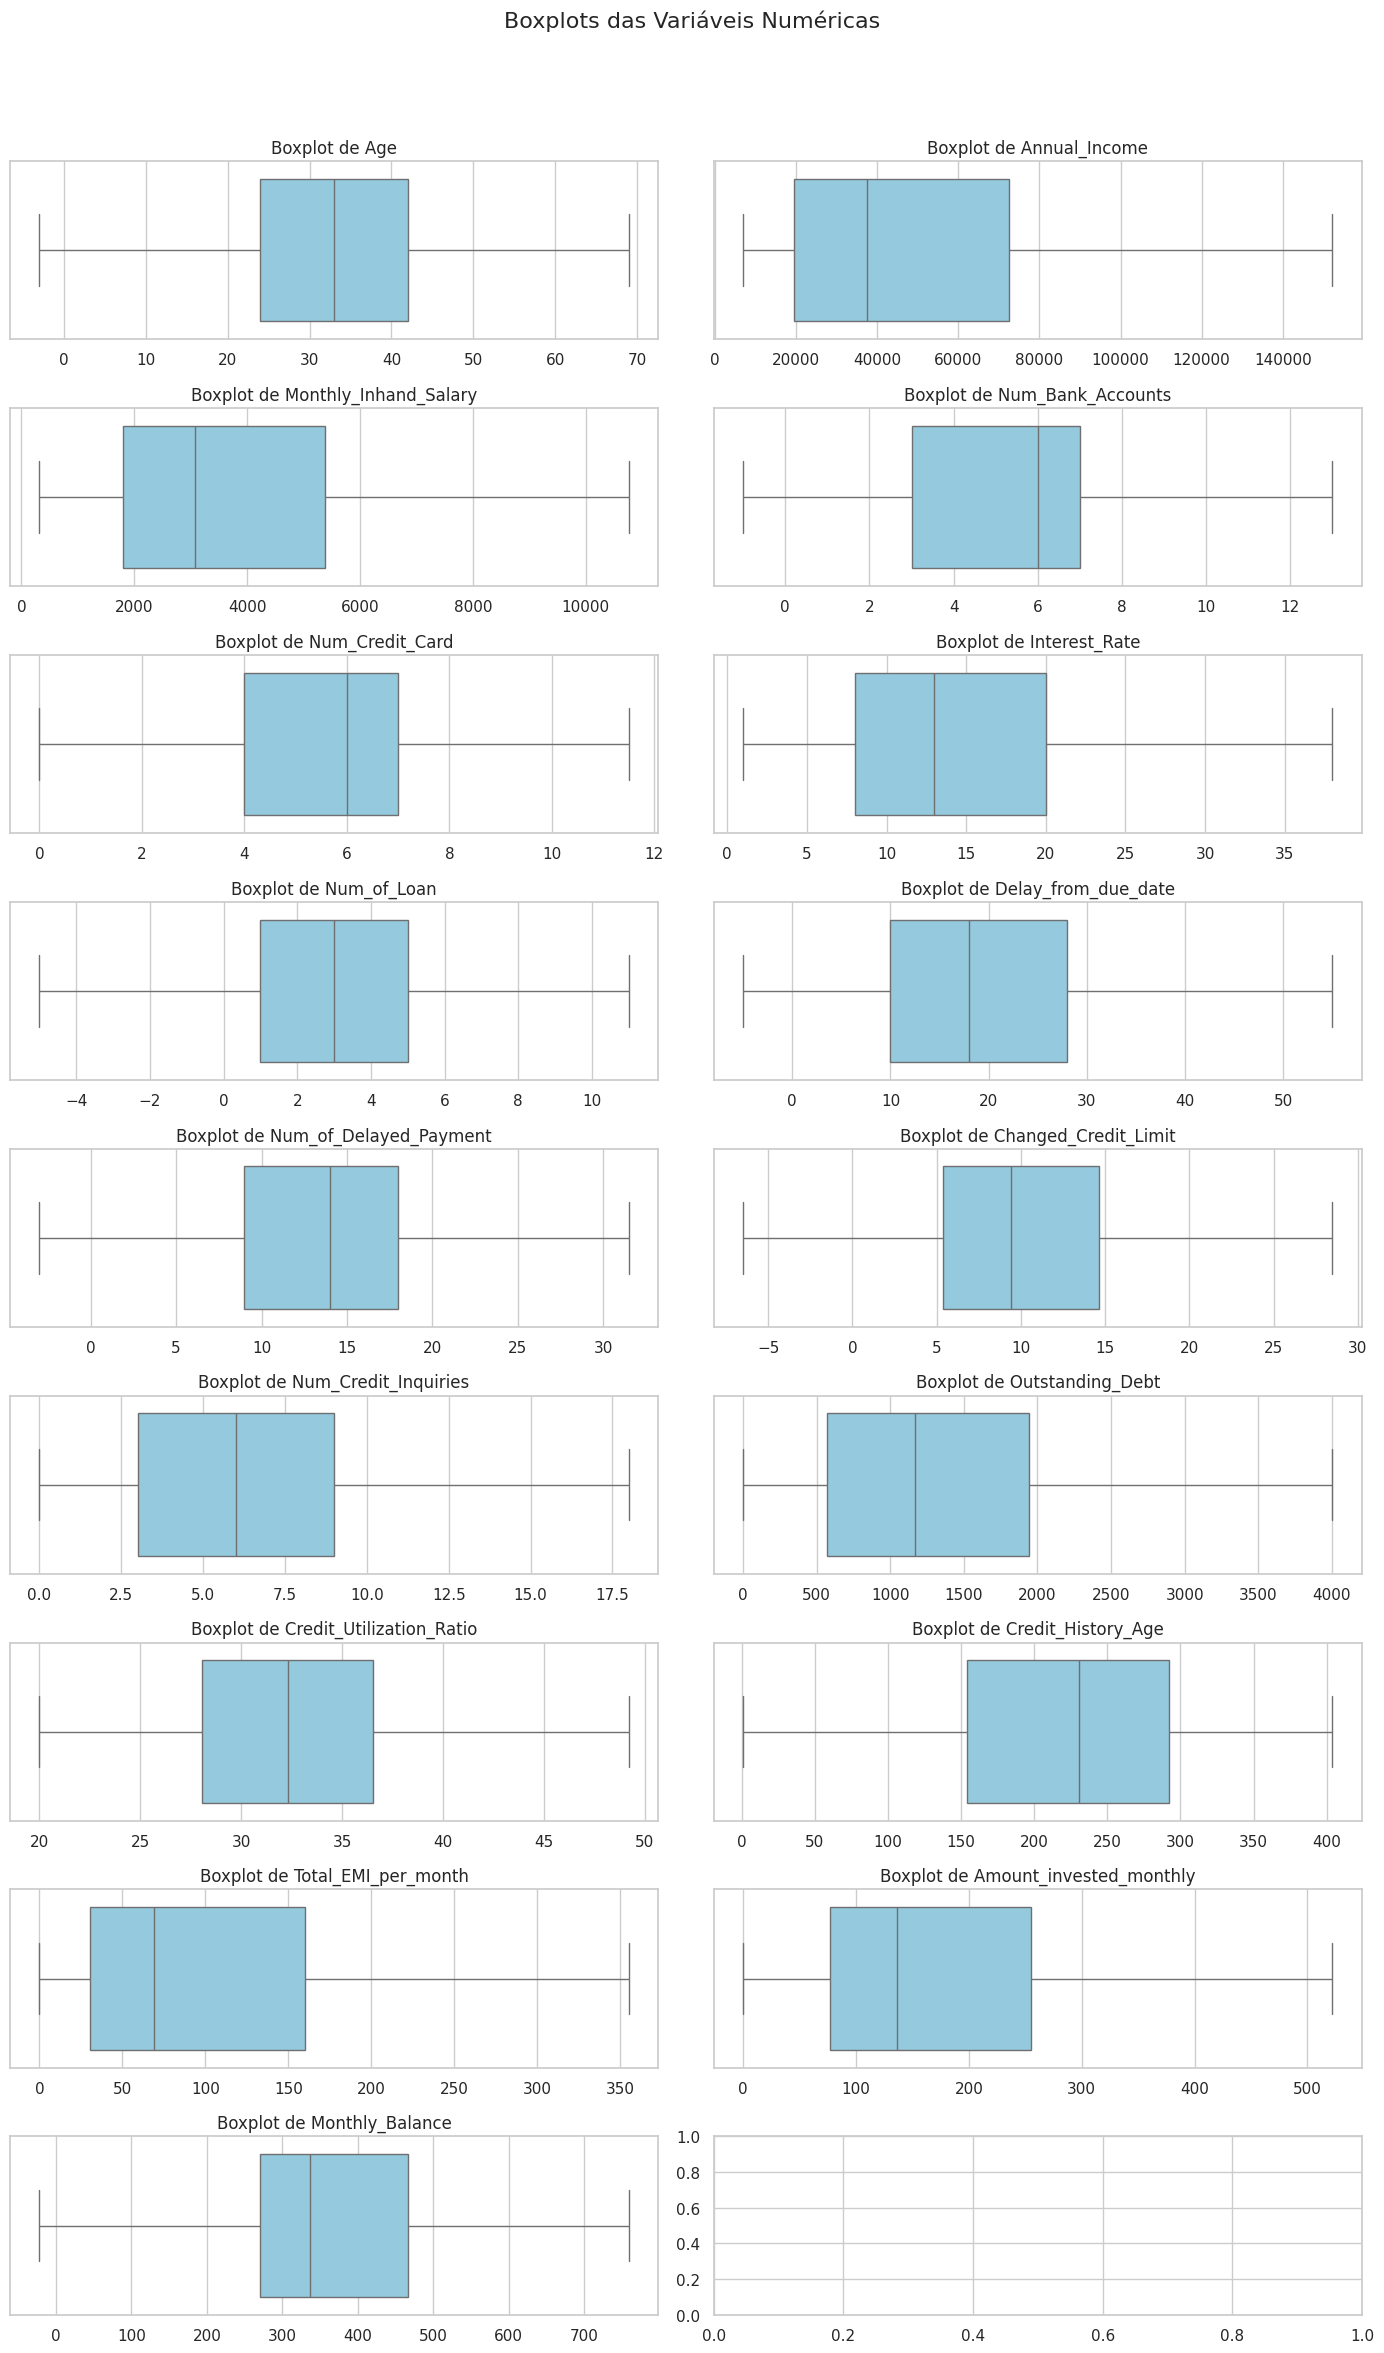

In [305]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(14, 24))
fig.suptitle("Boxplots das Variáveis Numéricas", fontsize=16)

bp_columns = numerical_df.columns.tolist()

for ax, bp_columns in zip(axes.flat, bp_columns):
    sns.boxplot(data=df_winsorized, x=bp_columns, ax=ax, color='skyblue')
    ax.set_title(f'Boxplot de {bp_columns}')
    ax.set_xlabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

estatísticas descritivas, incluindo os percentis **95** e **99**

In [306]:
df_winsorized[['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Num_Credit_Inquiries','Amount_invested_monthly','Monthly_Balance']].describe(percentiles=[0.95, 0.99])

,Monthly_Inhand_Salary,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Amount_invested_monthly,Monthly_Balance
count,83144.000000,83144.000000,83144.000000,83144.000000,83144.000000,83144.000000
mean,3955.314391,13.465764,10.326351,5.993553,191.370913,386.389723
std,2762.361614,6.270017,6.664497,4.099540,154.452858,171.915038
min,319.556250,-3.000000,-6.490000,0.000000,0.000000,-21.907686
50%,3081.977500,14.000000,9.390000,6.000000,136.081810,336.618257
95%,10511.765000,23.000000,23.450000,13.000000,522.220736,759.060034
99%,10760.987918,27.000000,28.490000,18.000000,522.220736,759.060034
max,10760.987918,31.500000,28.490000,18.000000,522.220736,759.060034


#### Histograma (Sem Outliers)

**Distribuições Assimétricas à Direita (Skew para direita / valores concentrados à esquerda)**

- **Annual_Income**:	A maioria ganha até 40 mil, poucos ganham mais
- **Monthly_Inhand_Salary**:	A maior parte ganha até 5.000 por mês
- **Total_EMI_per_month**:	Maioria paga parcelas pequenas, poucos com EMIs altos
- **Amount_invested_monthly**:	A maioria investe valores baixos, poucos investem muito
- **Outstanding_Debt**:	Dívidas concentradas em valores pequenos, poucos casos acima de 2.000<br><br>

**Distribuições aproximadamente simétricas ou levemente enviesadas**

- **Age**:	Pico entre 30-40 anos, distribuição razoavelmente normal
- **Num_Credit_Card**:	Pico entre 4 e 7 cartões, distribuição bem equilibrada
- **Credit_Utilization_Ratio**:	Entre 25% e 40% com pico em ~30%, o que é saudável
- **Num_Credit_Inquiries**:	Pico por volta de 5-6 consultas, depois vai caindo — ok<br><br>

**Distribuições com valores inesperados ou picos artificiais**

- **Monthly_Balance**:	Pico súbito no final da distribuição → pode ser efeito da winsorização
- **Changed_Credit_Limit**:	Pequeno pico nos valores mais altos, pode ser comportamento normal de política de crédito
- **Delay_from_due_date**:	Pico forte próximo de 50 dias → pode ser limite artificial (valor máximo possível)
- **Amount_invested_monthly, Total_EMI_per_month**:	Também têm picos ao final, indicando valores "forçados" para o limite superior definido na winsorização<br><br>

**Distribuições normais ou quase uniformes**

- **Num_of_Loan**:	Levemente simétrica com leve skew positivo
- **Num_Bank_Accounts**:	Bem distribuída, valores entre 3 e 9 dominam

Codificação de variáveis categóricas (categorical encoding)

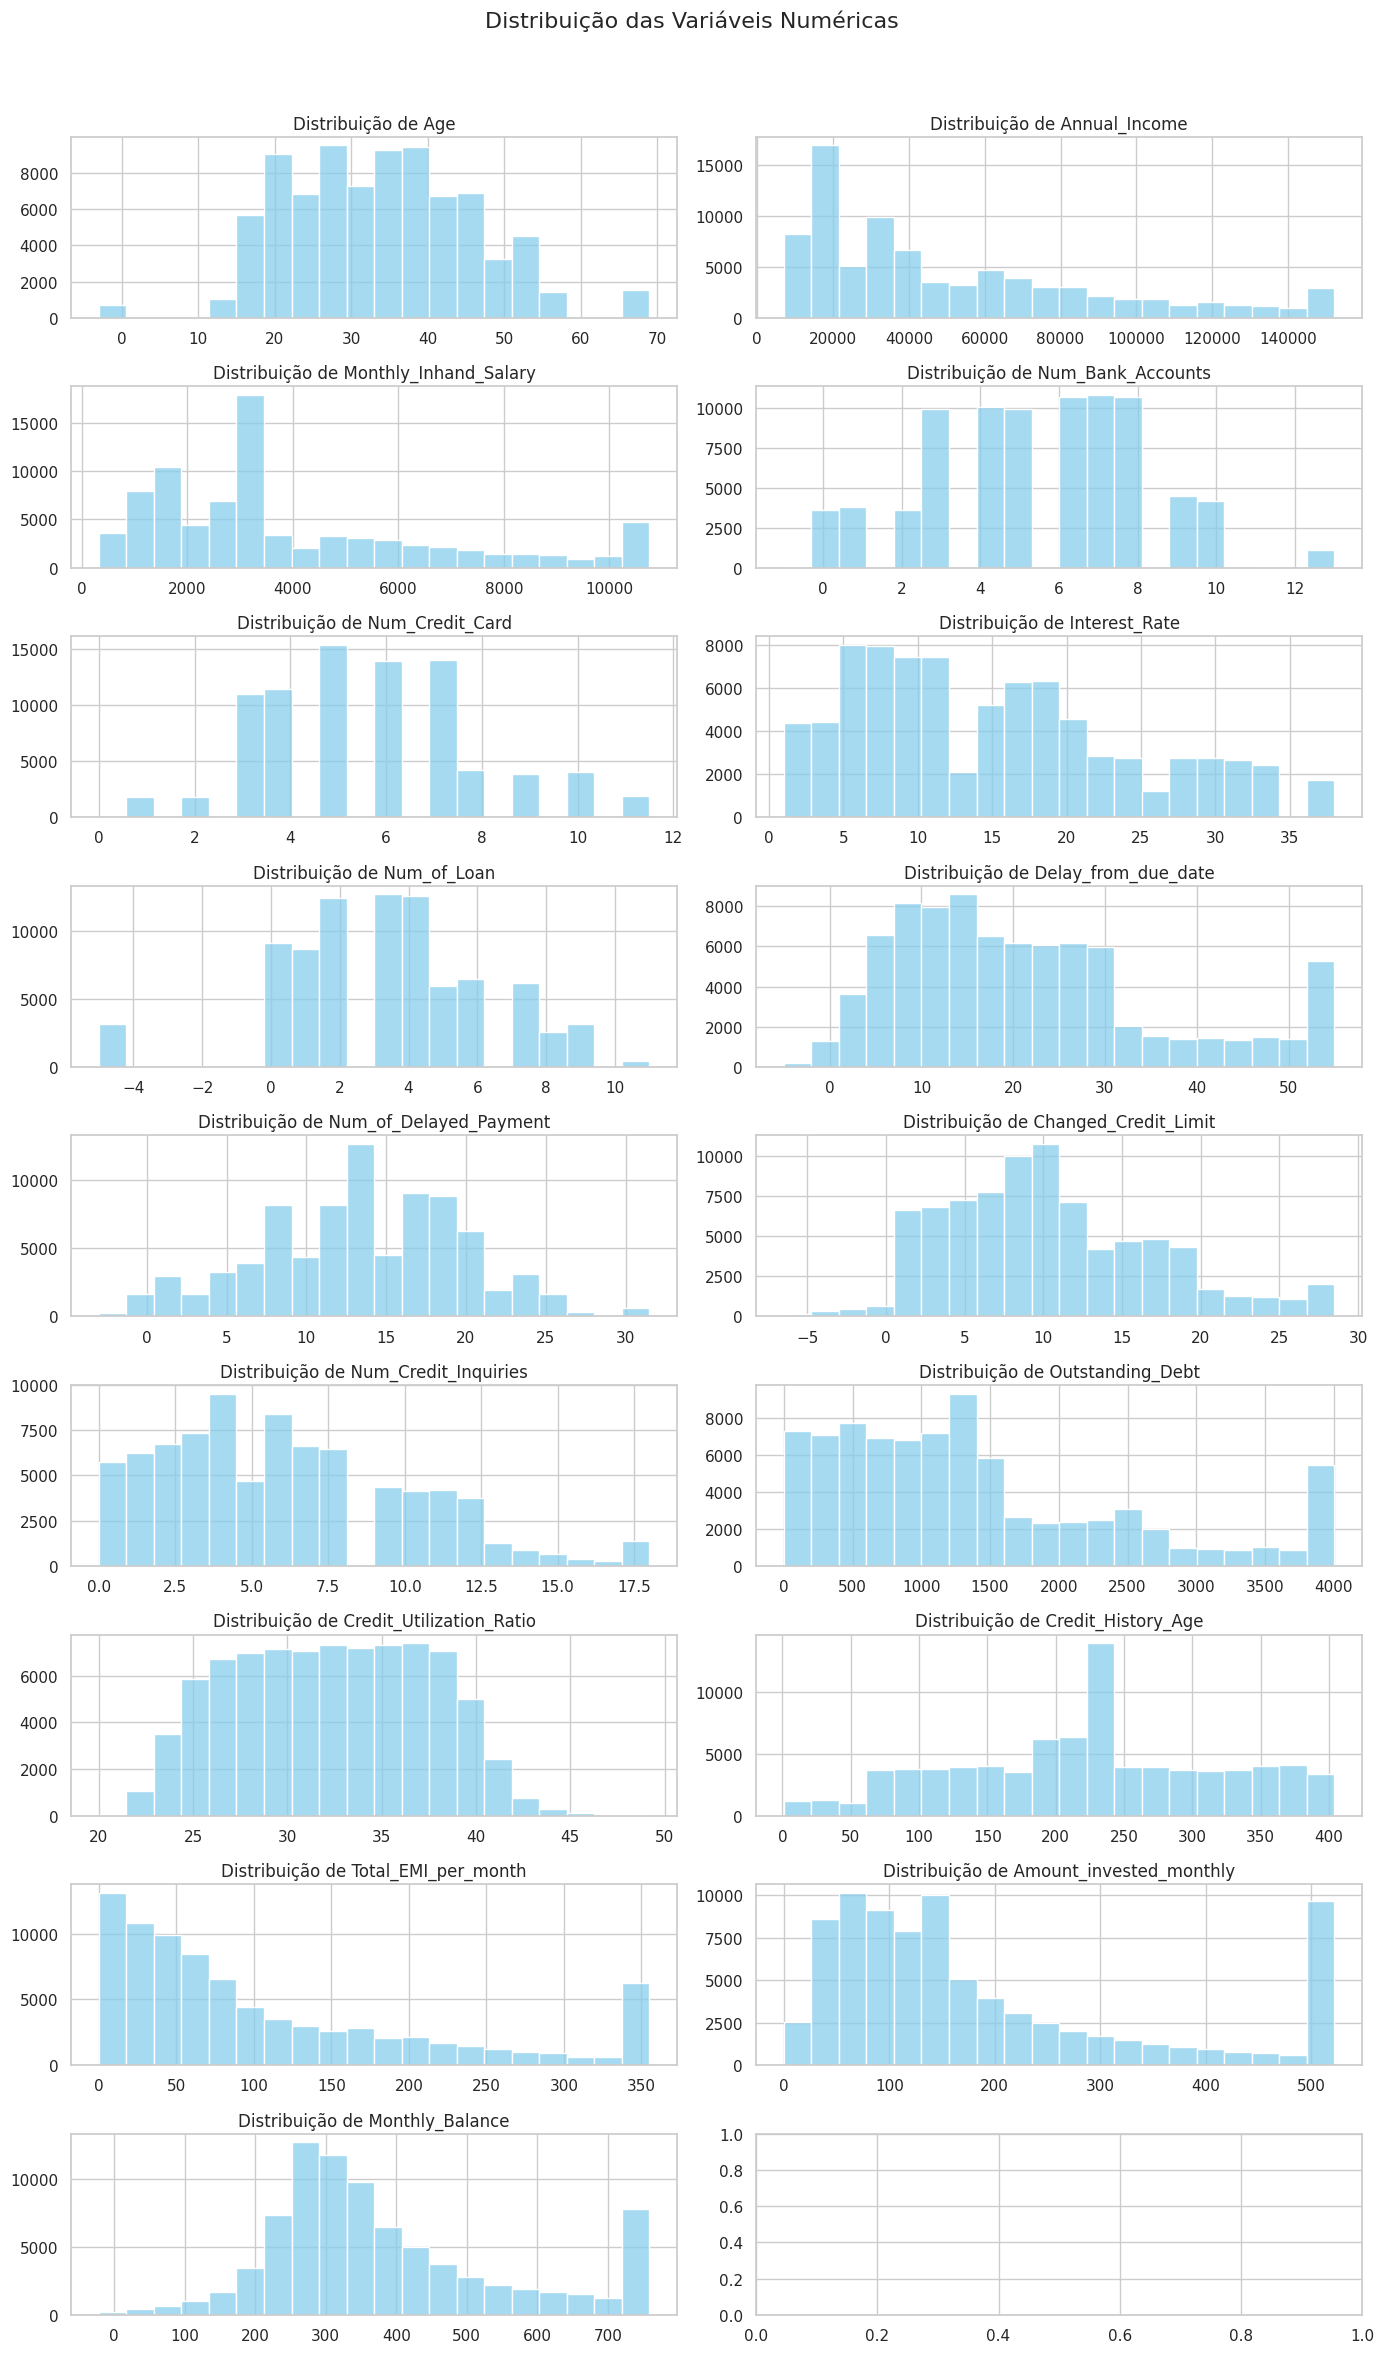

In [307]:
fig, axs = plt.subplots(9, 2, figsize=(14, 24))
fig.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)

for ax, column in zip(axs.flat, numerical_df):
    sns.histplot(df_winsorized[column], bins=20, ax=ax, color='skyblue')
    ax.set_title(f'Distribuição de {column}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Categorical Encoding

#### Ordinal Encoding

In [308]:
credit_mix_map = {'Unknown': -1, 'Bad': 0, 'Standard': 1, 'Good': 2}
df_winsorized['Credit_Mix'] = df_winsorized['Credit_Mix'].map(credit_mix_map)

credit_score_map = {'Poor': 0, 'Standard': 1, 'Good': 2}
df_winsorized['Credit_Score'] = df_winsorized['Credit_Score'].map(credit_score_map)

#### Binária

In [309]:
df_winsorized['Payment_of_Min_Amount_Bin'] = df_winsorized['Payment_of_Min_Amount'].map({
    'Yes': 1, 'No': 0, 'Unknown': -1
})

#### One-Hot Encoding

In [310]:
df_winsorized = pd.get_dummies(df_winsorized, columns=['Month'], prefix='Month')

df_winsorized = pd.get_dummies(df_winsorized, columns=['Occupation'], prefix='Occ')

df_winsorized = pd.get_dummies(df_winsorized, columns=['Payment_Behaviour'], prefix='PayBehav')

In [311]:
df_winsorized.drop(['Payment_of_Min_Amount'], axis=1, inplace=True)

## Matriz de Correlação

**Negativamente correlacionadas (indicadores de risco):**

**Num_of_Delayed_Payment**: quanto mais atrasos, menor o score

**Credit_Utilization_Ratio**: uso excessivo do crédito piora o score

**Outstanding_Debt**: dívidas elevadas impactam negativamente<br><br>

**Positivamente correlacionadas (indicadores de estabilidade):**

**Monthly_Balance**: maior saldo mensal sugere bom controle financeiro

**Amount_invested_monthly**: associado a perfil mais estável

In [312]:
plt.figure(figsize=(50, 46))
sns.heatmap(
    df_winsorized.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    cmap="magma",
    cbar=False
)

plt.title('Heatmap da Matriz de Correlação', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

## Random Forest

Para o modelo de classificação supervisionada, aplicaremos o **Random Forest** com **SMOTE** para balancear a variável alvo

- primeiro exluimos as varáveis sem relevância para o modelo preditivo: **ID**, **Customer_ID**, **Name**, **SSN**, em seguida separamos as variáveis depentes e independetes

- aplicamos o **SMOTE (Synthetic Minority Over-sampling Technique)** aumentando artificialmente a quantidade de registros das classes com menos exemplos (Good e Poor), criando novas amostras sintéticas baseadas nas existentes

- Em seguida separamos os dados em treino e teste mantendo **20%** da base como teste, definimos um classificador **Random Forest** com **n_estimators=100**

In [313]:
colunas_drop = ['ID', 'Customer_ID', 'Name', 'SSN']
df_model = df_winsorized.drop(columns=colunas_drop, errors='ignore')

X = df_model.drop(columns=['Credit_Score'])
y = df_model['Credit_Score']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [314]:
y_pred = rf.predict(X_test)

**Classe 0 — Poor**
- Precision: 82% das previsões para Poor estavam corretas

- Recall: O modelo encontrou 86% de todos os casos reais de Poor

- F1-score: Equilíbrio muito bom entre precisão e recall

O modelo está muito eficiente em identificar clientes com score baixo.<br><br>


**Classe 1 — Standard**
- Precision: 0.80

- Recall: 0.73

- F1-score: 0.76

Aqui o desempenho é um pouco mais fraco, especialmente no recall

Isso significa que o modelo está confundindo alguns clientes Standard com Poor ou Good<br><br>


**Classe 2 — Good**
- Precision: 0.84

- Recall: 0.89

- F1-score: 0.87

Excelente desempenho para prever bons pagadores, o modelo está identificando com bastante acerto e segurança quem tem bom score<br><br>


**Métricas globais:**

- Accuracy: Modelo acerta 82% das previsões

### Classification Report

In [315]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      8843
           1       0.86      0.75      0.80      8844
           2       0.84      0.93      0.88      8844

    accuracy                           0.85     26531
   macro avg       0.85      0.85      0.85     26531
weighted avg       0.85      0.85      0.85     26531



**Classe 0 — Poor**
- 7702 casos foram corretamente classificados como Poor
- 580 foram erroneamente classificados como Standard
- 561 foram erroneamente classificados como Good

Conclusão: o modelo identifica bem a classe Poor (baixo número de erros)<br><br>

**Classe 1 — Standard**
- 6631 corretamente como Standard
- 1150 foram confundidos com Poor
- 1063 foram confundidos com Good

Conclusão: a classe Standard tem a maior taxa de confusão, o modelo tem dificuldade em separá-la das demais, especialmente da classe Poor<br><br>

**Classe 2 — Good**
- 8269 corretamente como Good
- 511 confundidos com Standard
- 64 com Poor

Conclusão: o modelo tem excelente desempenho para a classe Good, com pouquíssimos erros<br><br>

O modelo Random Forest está performando muito bem, com destaque positivo nas classes Poor e Good.
A classe Standard ainda tem espaço para melhoria, talvez com mais features, balanceamento ou ajuste fino do modelo

### Matriz de Confusão

Confusion Matrix:


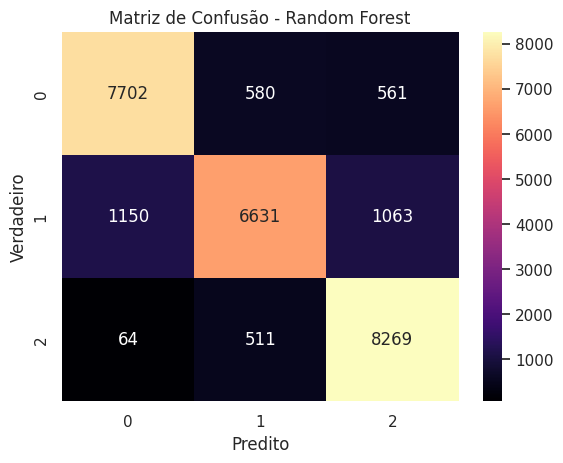

In [316]:
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="magma")
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

### Como Este Modelo Pode Ser Utilizado?

O modelo de previsão de credit score pode ser usado para apoiar decisões financeiras ao classificar automaticamente os novos clientes em perfis de risco, com base no conhecimento do modelo, como baixo, médio ou alto.<br>

Com base nessa classificação, a instituição financeira pode aprovar ou negar crédito, ajustar limites e definir taxas de juros adequadas para cada perfil.<br>

Clientes com bom score recebem condições mais vantajosas, enquanto os de score baixo podem ser recusados ou ter crédito aprovado com exigências maiores. Além disso, o modelo ajuda a personalizar ofertas de produtos e a gerenciar melhor os riscos da carteira de clientes

## KMeans

O objetivo deste agrupamento é segmentar os clientes com base em seus comportamentos financeiros, sem usar o **Credit_Score**, que é uma variável target.<br>

Isso permite identificar grupos de clientes com perfis semelhantes, como:

- Clientes com alto endividamento

- Clientes com bom controle financeiro

- Clientes jovens com alto potencial de crescimento

Esses perfis podem ser utilizados em campanhas de marketing, ajuste de políticas de crédito e personalização de produtos

Removemos a variável **Credit_Score** e usamos variáveis como:

**Age**, **Monthly_Inhand_Salary**, **Outstanding_Debt**, **Credit_Utilization_Ratio**, **Num_of_Loan**, **Num_Credit_Inquiries**, **Monthly_Balance**

In [317]:
features = ['Age', 'Monthly_Inhand_Salary', 'Outstanding_Debt',
            'Credit_Utilization_Ratio', 'Num_of_Loan', 'Num_Credit_Inquiries',
            'Monthly_Balance']

X_cluster = df_winsorized[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_winsorized['Cluster'] = clusters

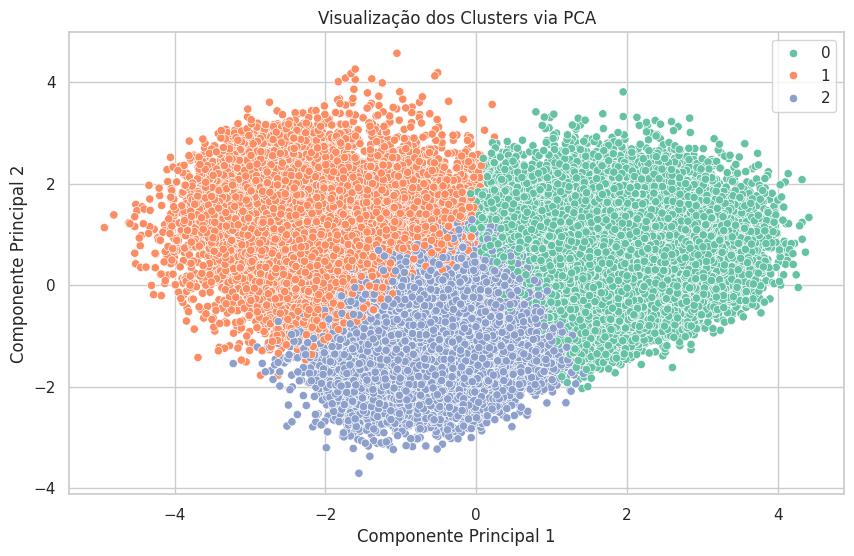

In [318]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='Set2')
plt.title('Visualização dos Clusters via PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

### Conclusões

O algoritmo KMeans identificou 3 grupos distintos de clientes com base em suas características financeiras. Ao analisar cada cluster, é possível perceber perfis como:<br><br>

**Cluster 0:** Clientes com alta renda e baixo uso de crédito (baixo risco)

**Cluster 1:** Clientes com muitos empréstimos e alto comprometimento da renda (alto risco)

**Cluster 2:** Jovens com pouca renda e poucos dados históricos (risco intermediário)<br><br>

Esses agrupamentos podem ser valiosos para criar ações específicas por segmento, melhorar a abordagem comercial e apoiar decisões mais estratégicas na concessão de crédito<br><br>

**Desafios enfrentados**

- A interpretação dos clusters requer apoio do time de negócio para associar comportamento aos grupos

- A padronização foi essencial para evitar que variáveis com escalas maiores dominassem o clustering